# Layered Seawater Intrusion and Melt Under Grounded Ice

This Jupyter notebook is meant as a companion to the manuscript by Robel, Wilson and Seroussi on the intrusion of seawater under grounded ice sheets. This notebook will produce equivalent versions to figures 2-4 and has an interactive cell that shows how changes in various parameters change the numerically-calculated intrusion distance. Figures 6-7 use ISSM MATLAB functions to load and plot ISSM model output, so are available separately as MATLAB scripts (in the same GitHub repository where this is available). GitHub repository: XXX

## Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
#ipywidgets is loaded further down for the interactive intrusion calculation

## Define function for numerically calculating intrusion distance

In [2]:
def intrusion(Fr0,Ci,Cd,theta,gamma):
    h=np.empty([100000, 1])
    x=np.empty([100000, 1])
    #Initial conditions
    h[0] = Fr0**(2/3)
    x[0] = 0
    i=0
    int=1e16
    while h[i] < 1: #stop when freshwater occupies entire layer
        dx = 1e-16 + (1e-1-1e-16)*np.tanh(-1/int)
        #start with very small O(machine precision) grid spacing and then increase as gradient decreases
        if i==0 :
            Fr = 1 - 1e-8  #avoid singularity due to Fr=1 at boundary while maintaining accuracy (has been tested for sensitivity)
        else:
            Fr = Fr0/(h[i]**1.5)
    
        int = ((Fr**2)*((Ci/(1-h[i])) + Cd*(1+gamma*h[i])) - theta)/(Fr**2 - 1)
    
        h[i+1] = h[i] - dx*int
        x[i+1] = x[i] - dx
        i = i+1;
        if i > 100000-2:
            break
    return x, h, i

0.0

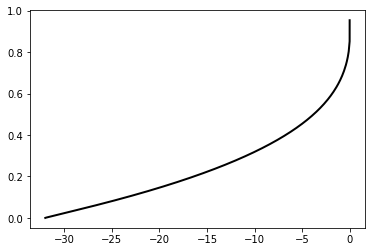

In [3]:
#Small Fr0 and large gamma
Fr0 = 1e-2;
Ci = 1e-1;
Cd = 1;
theta = 0;
gamma = 100;
x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)


plt.plot(x[0:i],1-h[0:i],linewidth=2,color='black')

np.tanh(0)

## Figure 2

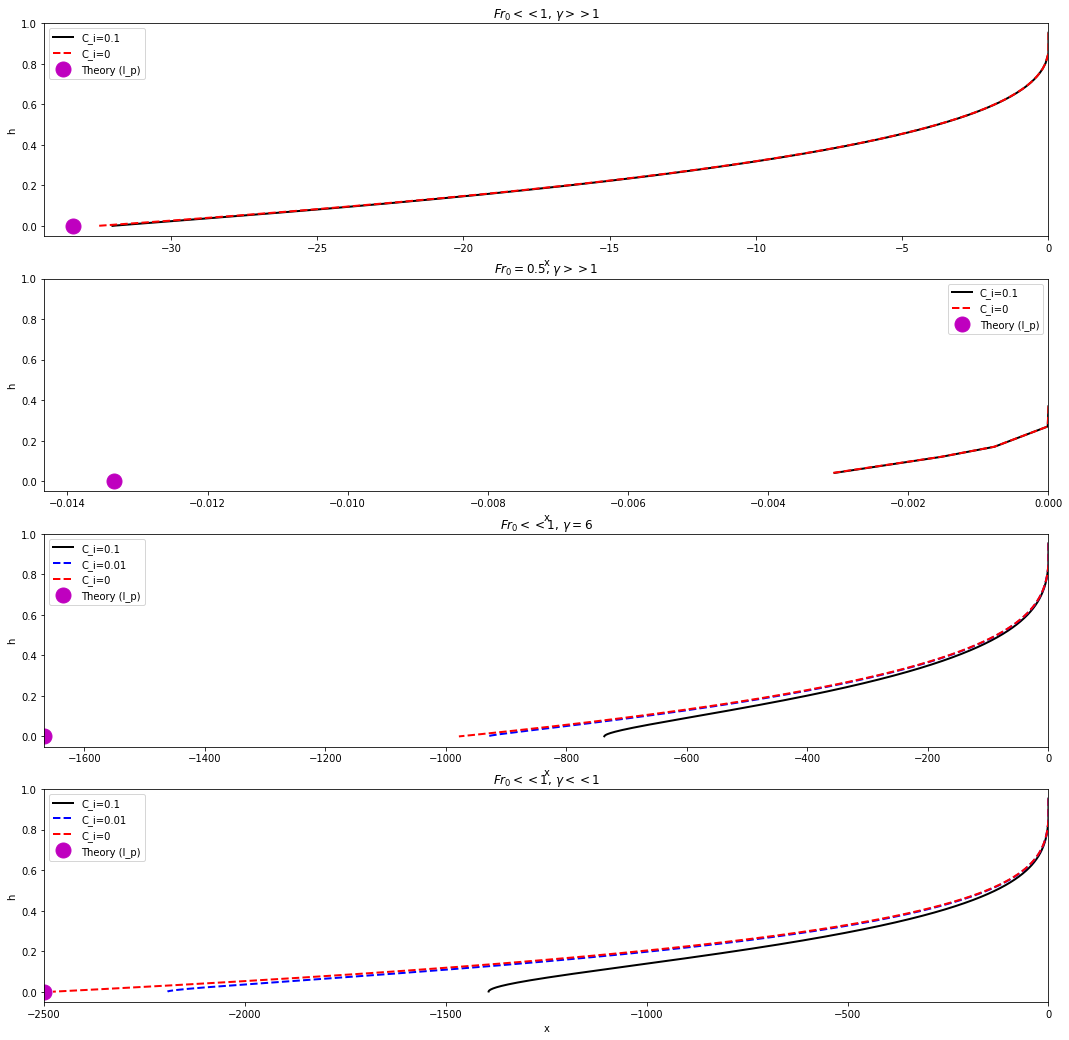

In [5]:
#Small Fr0 and large gamma
Fr0 = 1e-2;
Ci = 1e-1;
Cd = 1;
theta = 0;
gamma = 100;
x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(18,18))

ax1.set_xlabel('x')
ax1.set_ylabel('h')
ax1.plot(x[0:i],1-h[0:i],linewidth=2,color='black')
ax1.set_ylim([-0.05, 1])
ax1.set_xlim([x[i], 0])

#without C_i and  with small Fr0  and large gamma
h=[];
x=[];
Ci = 0;
x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)
ax1.plot(x[0:i],1-h[0:i],linewidth=2,linestyle='dashed',color='red')

l_p = 1/(3*gamma*Cd*Fr0**2);
ax1.plot(-l_p,0,linestyle = 'None',marker='.',markersize=30,Color='m')
ax1.legend(['C_i=0.1','C_i=0','Theory (l_p)'])
ax1.set_xlim([-l_p-1, 0])
ax1.set_title(r'$Fr_0<<1$, $\gamma>>1$')


#Integration from ocean upstream with all terms and large Fr0
Ci = 1e-1;
Fr0 = 5e-1;
x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)

ax2.set_xlabel('x')
ax2.set_ylabel('h')
ax2.plot(x[0:i],1-h[0:i],linewidth=2,color='black')
ax2.set_ylim([-0.05, 1])
ax2.set_xlim([x[i], 0])

#without C_i and large Fr0
Ci = 0;
Fr0 = 5e-1;
x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)
ax2.plot(x[0:i],1-h[0:i],linewidth=2,linestyle='dashed',color='red')

l_p = 1/(3*gamma*Cd*Fr0**2);
ax2.plot(-l_p,0,linestyle = 'None',marker='.',markersize=30,Color='m')
ax2.legend(['C_i=0.1','C_i=0','Theory (l_p)'])
ax2.set_xlim([-l_p-0.001, 0])
ax2.set_title(r'$Fr_0=0.5$, $\gamma>>1$')

#With all terms and medium gamma
Ci = 1e-1;
Fr0 = 1e-2;
gamma=2;
x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)

ax3.set_xlabel('x')
ax3.set_ylabel('h')
ax3.plot(x[0:i],1-h[0:i],linewidth=2,color='black')
ax3.set_ylim([-0.05, 1])
ax3.set_xlim([x[i], 0])

#Without C_i and medium gamma
Ci = 1e-2;
Fr0 = 1e-2;
x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)
ax3.plot(x[0:i],1-h[0:i],linewidth=2,linestyle='dashed',color='blue')

#without C_i and medium gamma
Ci = 0;
Fr0 = 1e-2;
x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)
ax3.plot(x[0:i],1-h[0:i],linewidth=2,linestyle='dashed',color='red')

l_p = 1/(3*gamma*Cd*Fr0**2);
ax3.plot(-l_p,0,linestyle = 'None',marker='.',markersize=30,Color='m')
ax3.legend(['C_i=0.1','C_i=0.01','C_i=0','Theory (l_p)'])
ax3.set_xlim([-l_p-0.1, 0])
ax3.set_title(r'$Fr_0<<1$, $\gamma=6$')

#with all terms and zero gamma
Ci = 1e-1;
Fr0 = 1e-2;
gamma = 1e-2;
x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)

ax4.set_xlabel('x')
ax4.set_ylabel('h')
ax4.plot(x[0:i],1-h[0:i],linewidth=2,color='black')
ax4.set_ylim([-0.05, 1])
ax4.set_xlim([x[i], 0])

#Small C_i and zero gamma
Ci = 1e-2;
Fr0 = 1e-2;
x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)
ax4.plot(x[0:i],1-h[0:i],linewidth=2,linestyle='dashed',color='blue')


#Without C_i and zero gamma
h=[];
x=[];
Ci = 0;
Fr0 = 1e-2;
x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)
ax4.plot(x[0:i],1-h[0:i],linewidth=2,linestyle='dashed',color='red')

l_u = 1/(4*Cd*Fr0**2);
ax4.plot(-l_u,0,linestyle = 'None',marker='.',markersize=30,Color='m')
ax4.legend(['C_i=0.1','C_i=0.01','C_i=0','Theory (l_p)'])
ax4.set_xlim([-l_u-0.1, 0])
ax4.set_title(r'$Fr_0<<1$, $\gamma<<1$')
plt.show()


## Figure 3

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


NameError: name 'im' is not defined

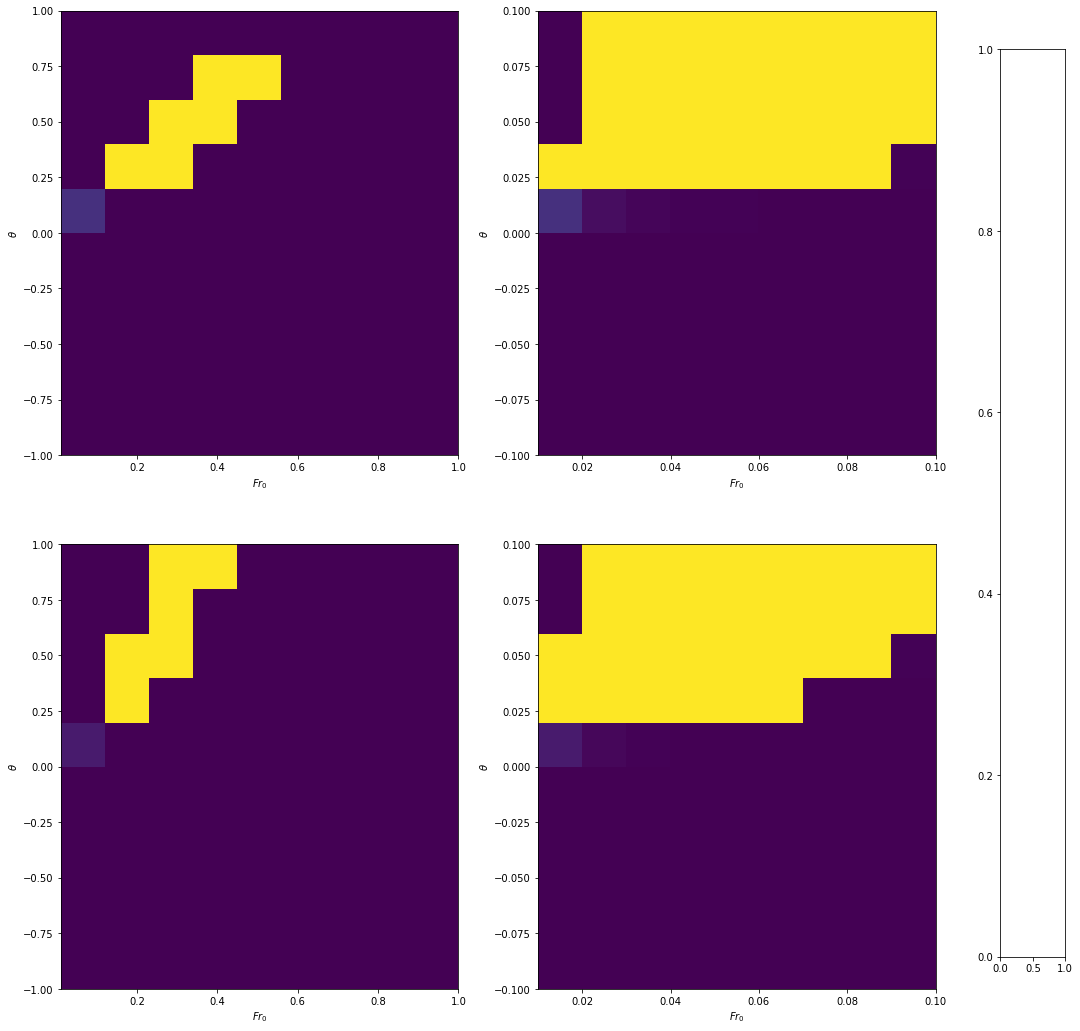

In [6]:
n1=10
n2=11;
#Zoomed out Parameter sweep for gamma = 0 and Ci = 0.1
gamma = 0;
Ci = 1e-1;
Cd = 1;
 
Ls = np.zeros([n1,n2])
Fr0s = np.linspace(0.01,1,n1)
thetas = np.linspace(-1,1,n2)
for a in np.arange(n1):
    Fr0 = Fr0s[a]
    for b in np.arange(n2):
        theta = thetas[b]
        x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)
        Ls[a,b] = -x[i];

#plot
FR0, THETA = np.meshgrid(Fr0s, thetas, sparse=False, indexing='ij')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(18,18))

ax1.pcolormesh(FR0, THETA,Ls, vmin=10, vmax=10000)
ax1.set_xlabel(r'$Fr_0$')
ax1.set_ylabel(r'$\theta$') 

#Zoomed in Parameter sweep for gamma = 0 and Ci = 0.1
gamma = 0;
Ci = 1e-1;
Cd = 1;
 
Ls = np.zeros([n1,n2])
Fr0s = np.linspace(0.01,0.1,n1)
thetas = np.linspace(-0.1,0.1,n2)
for a in np.arange(n1):
    Fr0 = Fr0s[a]
    for b in np.arange(n2):
        theta = thetas[b]
        x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)
        Ls[a,b] = -x[i];

#plot
FR0, THETA = np.meshgrid(Fr0s, thetas, sparse=False, indexing='ij')

ax2.pcolormesh(FR0, THETA,Ls, vmin=10, vmax=10000)
ax2.set_xlabel(r'$Fr_0$')
ax2.set_ylabel(r'$\theta$') 

#Zoomed out Parameter sweep for gamma = 2 and Ci = 0.1
gamma = 2;
Ci = 1e-1;
Cd = 1;
 
Ls = np.zeros([n1,n2])
Fr0s = np.linspace(0.01,1,n1)
thetas = np.linspace(-1,1,n2)
for a in np.arange(n1):
    Fr0 = Fr0s[a]
    for b in np.arange(n2):
        theta = thetas[b]
        x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)
        Ls[a,b] = -x[i];

#plot
FR0, THETA = np.meshgrid(Fr0s, thetas, sparse=False, indexing='ij')

ax3.pcolormesh(FR0, THETA,Ls, vmin=10, vmax=10000)
ax3.set_xlabel(r'$Fr_0$')
ax3.set_ylabel(r'$\theta$') 

#Zoomed Parameter sweep for gamma = 2 and Ci = 0.1 
gamma = 2;
Ci = 1e-1;
Cd = 1;
 
Ls = np.zeros([n1,n2])
Fr0s = np.linspace(0.01,0.1,n1)
thetas = np.linspace(-0.1,0.1,n2)
for a in np.arange(n1):
    Fr0 = Fr0s[a]
    for b in np.arange(n2):
        theta = thetas[b]
        x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)
        Ls[a,b] = -x[i];
        
#plot
FR0, THETA = np.meshgrid(Fr0s, thetas, sparse=False, indexing='ij')

ax4.pcolormesh(FR0, THETA,Ls, vmin=10, vmax=10000)
ax4.set_xlabel(r'$Fr_0$')
ax4.set_ylabel(r'$\theta$') 

## Figure 4

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


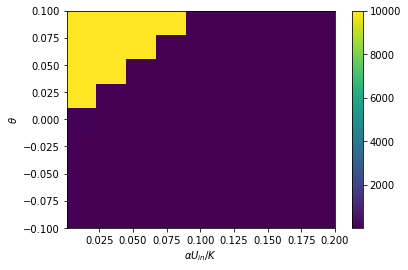

In [8]:
n=10
alphau_over_k_0 = 0.1
theta = np.linspace(-0.1,0.1,n)
mults  = np.linspace(1e-2,2,n)

LSOH = np.zeros([n,n])

for i in np.arange(n):
    mult = mults[i]
    
    alphau_over_k = alphau_over_k_0*mult
    Ls_over_H = -(1/np.tan(theta))*(1 + (alphau_over_k/np.tan(theta))*np.log(1 - (np.tan(theta)/alphau_over_k)))
    
    LSOH[i,:] = Ls_over_H;

np.nan_to_num(LSOH, copy=False, nan=10000)
MULT, THETA = np.meshgrid(mults,theta, sparse=False, indexing='ij')    

plt.pcolormesh(MULT*alphau_over_k_0, THETA, LSOH, vmin=10, vmax=10000)
plt.xlabel(r'$\alpha U_{in} / K$')
plt.ylabel(r'$\theta$') 


plt.colorbar()

## Interactive seawater intrusion calculation (for hard beds)

Here is an interactive widget where various physical parameters can be changed and the intrusion distance from theory is interactively calculated and plotted

In [9]:
from ipywidgets import interactive

In [29]:
def intrusionplot(Fr0,theta,gamma):
    Ci = 1e-3
    Cd = 1
    x, h, i = intrusion(Fr0,Ci,Cd,theta,gamma)
    plt.plot(x[0:i],1-h[0:i],linewidth=4)

    l_p = 1/(3*gamma*Cd*Fr0**2)
    l_u = 1/(4*Cd*Fr0**2)
    plt.plot(-l_p,0,linestyle = 'None',marker='.',markersize=30,Color='r')
    plt.plot(-l_u,0,linestyle = 'None',marker='.',markersize=30,Color='b')
    plt.legend(['Numerical','Theory (l_p)','Theory (l_u)'])
    plt.xlim([-l_u-1, 0])

In [30]:
interactive_plot = interactive(intrusionplot, Fr0=(0.01,1.0,0.01), theta=(-0.1,0.1,0.01),gamma=(0,10,1))
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='Fr0', max=1.0, min=0.01, step=0.01), FloatSlider(val…